In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

У нас есть набор различных параметров временных рядов. Данные параметры для одного временного ряда будут сочетаться между собой. Например,

    Временной ряд может быть полный с ростом и тенденциями за длительный период;

    Временной ряд может быть полный статичный с тенденциями за последний период;

    неполный с ростом и тенденциями за последний период.


При описании временных рядов регрессионными моделями обычно предполагается, что параметры моделей не изменяются на интервале наблюдения. Вместе с тем, например, экономические временные ряды часто демонстрируют нестационарное поведение, которое может быть обусловлено экономическими спадами, финансовыми кризисами, технологическими изменениями, положительными и отрицательными новостями и другими событиями.

Если изменения происходят в случайные моменты времени, то для адекватного описания могут быть использованы модели со скачкообразными изменениями параметров и с переключениями режимов работы

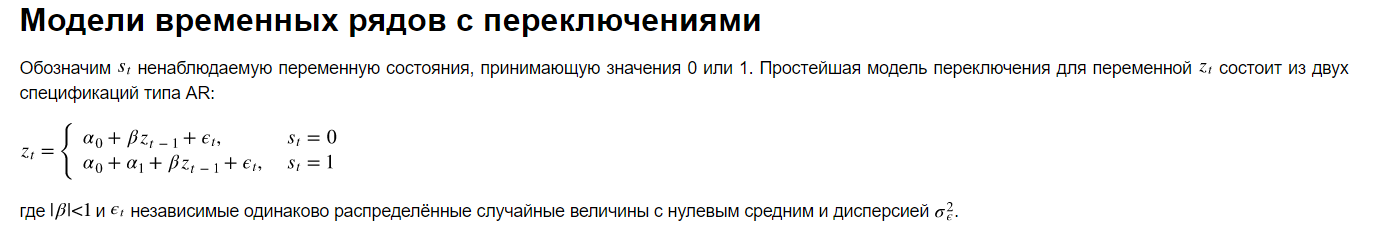

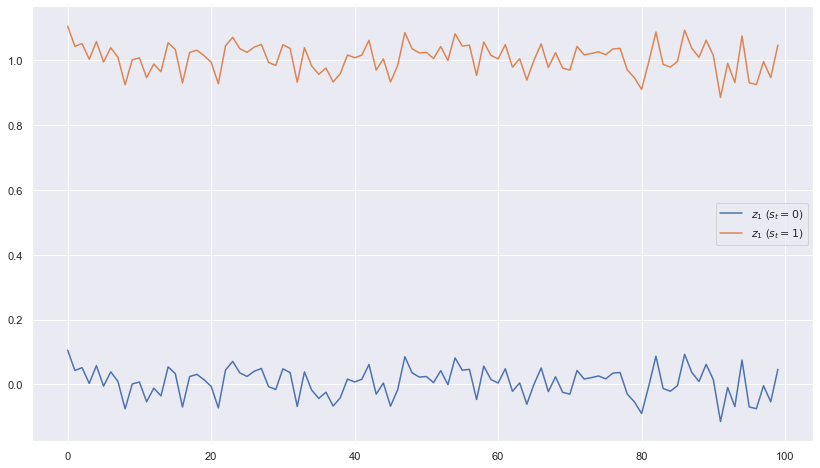

In [2]:
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
s = np.random.binomial(n=1, p=0.8, size=100)
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps

plt.figure(figsize=(14,8))
plt.plot(z1, label='$z_1$ ($s_t = 0$)')
plt.plot(z2, label='$z_1$ ($s_t = 1$)')
plt.legend()
plt.show()


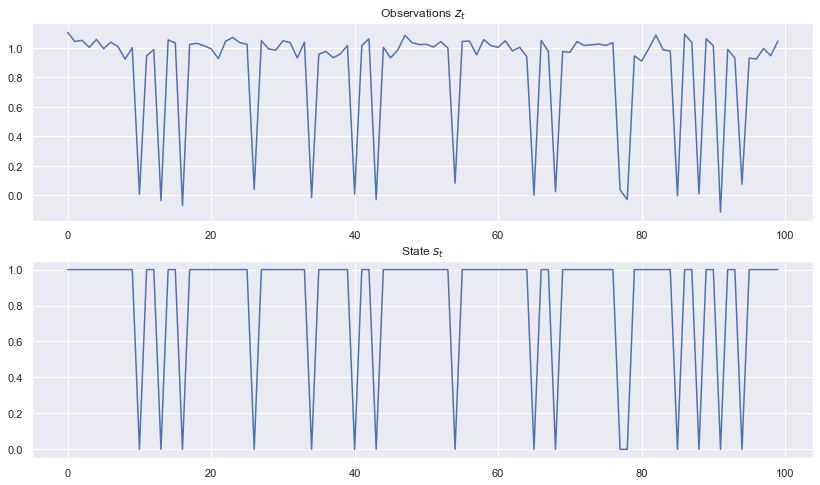

In [3]:
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])

f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

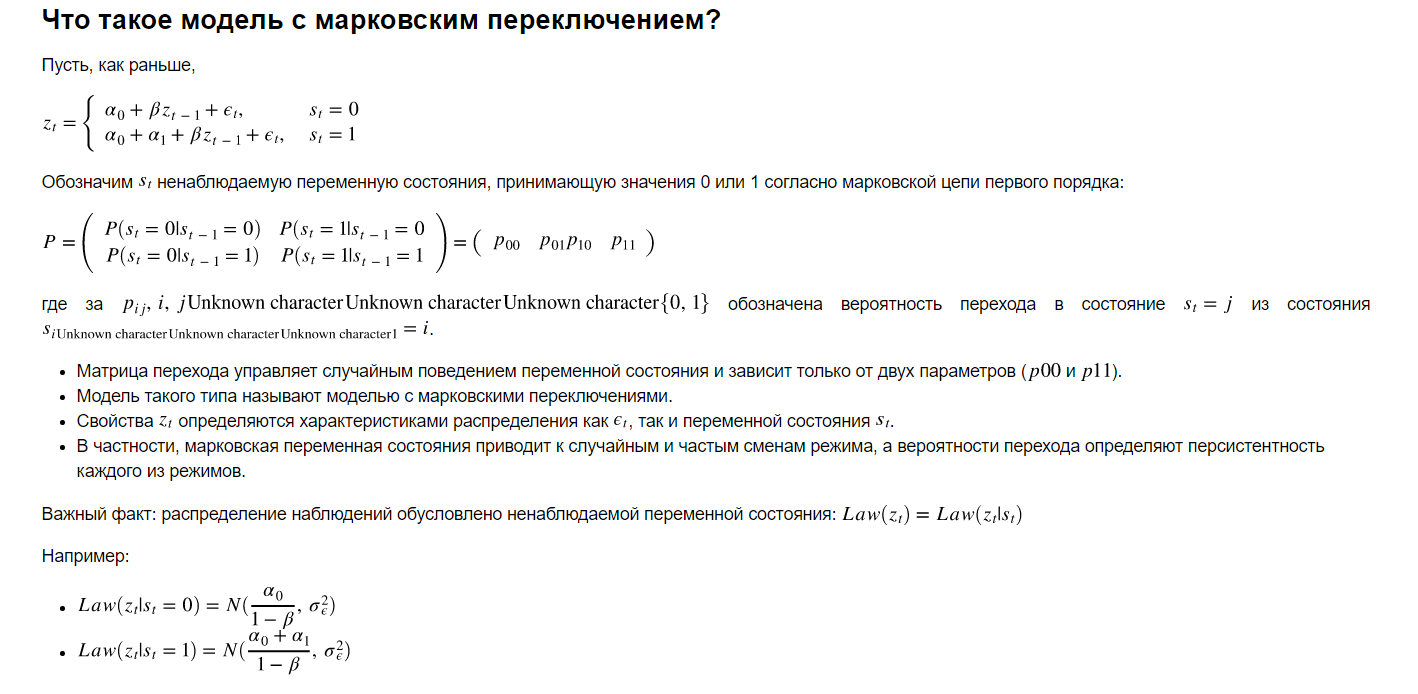

# Генерация траектории модели с марковскими переключениями

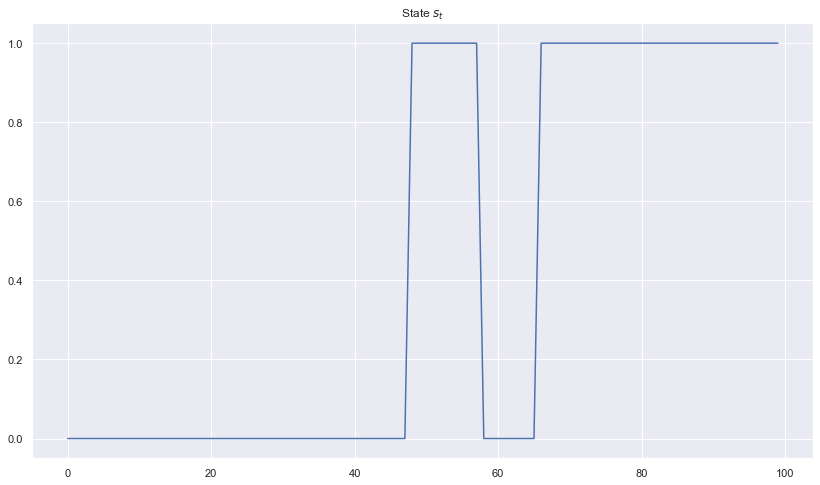

In [4]:
# 1. Генерирование марковской цепи с 2 скрытыми состояниями
P = np.array([
    [0.95, 0.05],
    [0.05, 0.95],
])
s = [0]
for t in range(99):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1], p=distribution))

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
axs.plot(s)
axs.set_title('State $s_t$')
plt.show()

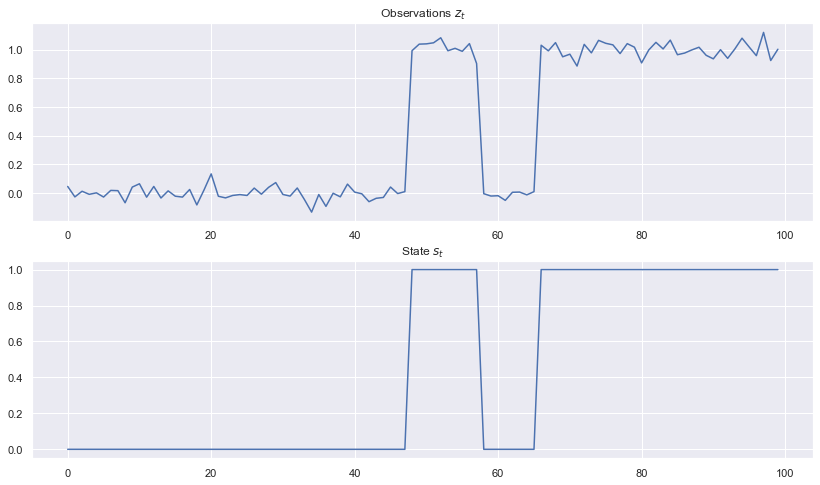

In [6]:

# 2. Генерирование наблюдений из распределений, обусловленных ненаблюдаемым состоянием
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

Генерация траектории скрытой марковской модели

No handles with labels found to put in legend.


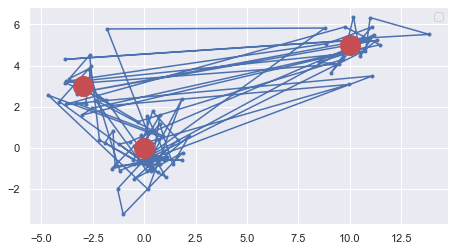

In [7]:
from hmmlearn import hmm
np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(X[:, 1], X[:, 0], '.-')
_ = axs.plot(model.means_[:, 1], model.means_[:, 0], 'ro', ms=20)
_ = axs.legend()
axs.set_aspect('equal')

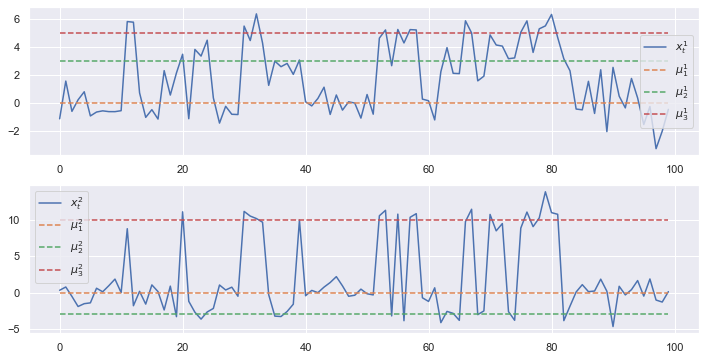

In [8]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
_ = axs[0].plot(X[:, 0], label='$x^1_t$')
for i in range(3):
    _ = axs[0].plot(range(len(X)), model.means_[i, 0] * np.ones(len(X)), '--', label='$\mu^1_{}$'.format(i+1))
_ = axs[0].legend()

_ = axs[1].plot(X[:, 1], label='$x^2_t$')
for i in range(3):
    _ = axs[1].plot(range(len(X)), model.means_[i, 1] * np.ones(len(X)), '--', label='$\mu^2_{}$'.format(i+1))
_ = axs[1].legend()

Прогноз с использованием HMM

In [18]:
from hmmlearn.hmm import GaussianHMM
series = pd.read_csv('../hmm/zp.csv', ';')['WAG_C_M']
series

0         15.3
1         19.1
2         23.6
3         30.6
4         37.5
5         47.4
6         56.0
7         65.4
8         80.9
9         93.0
10       101.5
11       141.2
12       134.2
13       144.7
14       164.8
15       171.5
16       183.5
17       207.5
18       221.0
19       232.8
20       253.2
21       265.0
22       281.6
23       354.2
24       302.6
25       321.0
26       361.5
27       386.2
28       429.9
29       480.6
        ...   
289    35497.0
290    37899.0
291    39225.0
292    39679.0
293    41454.0
294    38073.0
295    37099.0
296    38047.0
297    38333.0
298    38848.0
299    51197.0
300    39017.0
301    40443.0
302    42364.0
303    43381.0
304    44076.0
305    45848.0
306    42413.0
307    41364.0
308    41774.0
309    42332.0
310    42595.0
311    55569.0
312    42263.0
313    43062.0
314    46324.0
315    48030.0
316    47926.0
317    49348.0
318    45900.0
Name: WAG_C_M, Length: 319, dtype: float64

In [19]:
values = series.values.reshape(-1,1)
values

array([[1.5300e+01],
       [1.9100e+01],
       [2.3600e+01],
       [3.0600e+01],
       [3.7500e+01],
       [4.7400e+01],
       [5.6000e+01],
       [6.5400e+01],
       [8.0900e+01],
       [9.3000e+01],
       [1.0150e+02],
       [1.4120e+02],
       [1.3420e+02],
       [1.4470e+02],
       [1.6480e+02],
       [1.7150e+02],
       [1.8350e+02],
       [2.0750e+02],
       [2.2100e+02],
       [2.3280e+02],
       [2.5320e+02],
       [2.6500e+02],
       [2.8160e+02],
       [3.5420e+02],
       [3.0260e+02],
       [3.2100e+02],
       [3.6150e+02],
       [3.8620e+02],
       [4.2990e+02],
       [4.8060e+02],
       [4.9950e+02],
       [5.2060e+02],
       [5.6450e+02],
       [5.9450e+02],
       [6.1570e+02],
       [7.3550e+02],
       [6.5480e+02],
       [6.8440e+02],
       [7.4500e+02],
       [7.4650e+02],
       [7.7930e+02],
       [8.3720e+02],
       [8.4280e+02],
       [8.3100e+02],
       [8.4810e+02],
       [8.4330e+02],
       [8.3500e+02],
       [1.017

Cоздадим и обучим гауссовский HMM. Функция этого класса требует в качестве входных данных число скрытых состояний, число итераций для запуска из алгоритма Baum-Welch

Первым шагом в прогнозировании является обучение HMM для вычисления параметров из данной последовательности наблюдений.

In [21]:
for n in range(1, 15):
    model = GaussianHMM(n_components=n,
                        
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -3514.1425138246377
2 -3197.643648786964
3 -3039.13183177659
4 -2947.922363015116
5 -2907.704064006121
6 -2852.626712960112
7 -2829.1042868383943
8 -2787.6707798038633
9 -2778.404956872747
10 -2750.2454911498385
11 -2734.801514764764
12 -2730.505093604872
13 -2715.9198285346997
14 -2703.423748200877


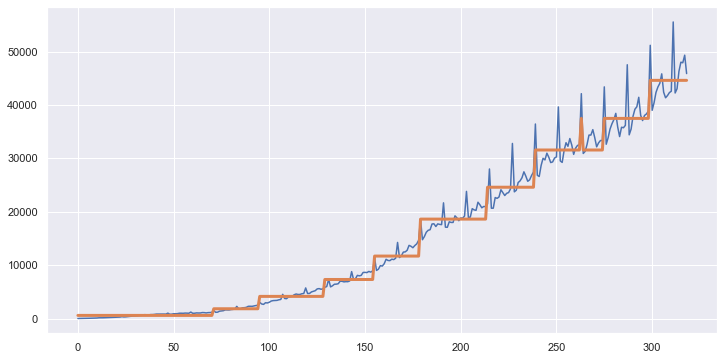

In [22]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [23]:
model.transmat_.shape
print(model.transmat_)

[[9.70017613e-001 0.00000000e+000 0.00000000e+000 2.19478153e-095
  0.00000000e+000 2.99823870e-002 0.00000000e+000 0.00000000e+000
  0.00000000e+000 7.67990947e-036]
 [0.00000000e+000 9.19254082e-001 3.11332954e-201 0.00000000e+000
  8.07454516e-002 0.00000000e+000 4.12053536e-055 4.66829679e-007
  1.95585913e-031 0.00000000e+000]
 [2.65884048e-114 0.00000000e+000 9.58542194e-001 0.00000000e+000
  0.00000000e+000 3.30593861e-038 4.14578062e-002 6.52642097e-209
  0.00000000e+000 7.20639667e-259]
 [4.32344849e-265 0.00000000e+000 0.00000000e+000 9.85805452e-001
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 1.41945477e-002]
 [0.00000000e+000 6.47799467e-002 1.41660962e-299 0.00000000e+000
  8.97355320e-001 0.00000000e+000 9.11921476e-112 1.10906176e-024
  3.78647338e-002 0.00000000e+000]
 [5.29657646e-036 0.00000000e+000 3.82732697e-002 8.04463276e-230
  0.00000000e+000 9.61726730e-001 0.00000000e+000 0.00000000e+000
  0.00000000e+000 4.59471857e-121